In [2]:
import pandas as pd
import numpy as np

## Notes
Gross Electricity Output- this represents the amount of electricity that passes through the National Grid (excluding imports). 
It also includes electricity that is manufactured and consumed by manufacturers of electricity. This series is dis-continued from January 2009 onwards.

Net Electricity Output - this represents the amount of electricity that passes through the National Grid (excluding imports). 
It does not include the manufacture and use of electricity by manufacturers of electricity. **This series starts from January 2007.**

There is a minor difference with these outputs as the data gets erratic towards the end regardless.

For 2008M12 as an example,
- Gross Electricity Output = 2657
- Net Electricity Output = 2518

GWh against time (months) will be graphed.

In [3]:
dataset = "datasets/MSM01.20241015T101006.csv"

In [4]:
df = pd.read_csv(dataset)

In [5]:
df.head()

,STATISTIC,Statistic Label,TLIST(M1),Month,C02196V02652,State,UNIT,VALUE
0,MSM01C1,Gross Electricity Output,197501,1975M01,-,State,Gigawatt Hours,752.0
1,MSM01C1,Gross Electricity Output,197502,1975M02,-,State,Gigawatt Hours,653.0
2,MSM01C1,Gross Electricity Output,197503,1975M03,-,State,Gigawatt Hours,679.0
3,MSM01C1,Gross Electricity Output,197504,1975M04,-,State,Gigawatt Hours,603.0
4,MSM01C1,Gross Electricity Output,197505,1975M05,-,State,Gigawatt Hours,550.0


**Month** and **VALUE** are the columns needed.

Gross Electricity Output and Net Electricity Output will be compiled together.

In [6]:
# Filters out both Electricity Output
to_remove = "MSM01C2"
to_filter = df["STATISTIC"].str.contains(to_remove)
df_gross_electricity = df[~to_filter]

to_remove = "MSM01C1"
to_filter = df["STATISTIC"].str.contains(to_remove)
df_net_electricity = df[~to_filter]

# Removes unnecessary columns and deletes any rows with missing data
df_gross_electricity = df_gross_electricity.drop(columns=["STATISTIC", "Statistic Label", "TLIST(M1)", "C02196V02652", "State", "UNIT"])
df_gross_electricity = df_gross_electricity.dropna()
df_gross_electricity

# Filter out the rows that contain years 2007-2008 in gross electricity as Net Electricity Output starts in 2007
df_gross_electricity = df_gross_electricity[~df_gross_electricity['Month'].str.startswith(('2007', '2008'))]

df_net_electricity = df_net_electricity.drop(columns=["STATISTIC", "Statistic Label", "TLIST(M1)", "C02196V02652", "State", "UNIT"])
df_net_electricity = df_net_electricity.dropna()
df_net_electricity

final_df = pd.concat([df_gross_electricity, df_net_electricity], ignore_index=True)

final_df

,Month,VALUE
0,1975M01,752.0
1,1975M02,653.0
2,1975M03,679.0
3,1975M04,603.0
4,1975M05,550.0
...,...,...
591,2024M04,2369.0
592,2024M05,2243.0
593,2024M06,2015.0
594,2024M07,2141.0


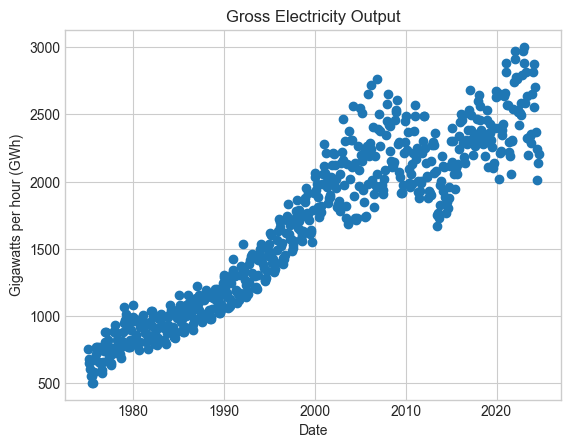

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

from datetime import datetime

def convertdatetime(yearmonth):
    year = int(yearmonth[:4])
    month = int(yearmonth[5:7])
    return datetime(year, month, 28)

x = final_df['Month'].apply(convertdatetime).to_numpy()
y = final_df['VALUE'].to_numpy()

plt.title('Gross Electricity Output')
plt.xlabel('Date')
plt.ylabel('Gigawatts per hour (GWh)')
x = final_df['Month'].apply(convertdatetime).to_numpy()
plt.scatter(x,y)

Intercept: 659.2045626710311
Coefficient: [0.11239246]
Mean Squared Error (MSE): 46529.59411473681
R² Score: 0.8815885828801298


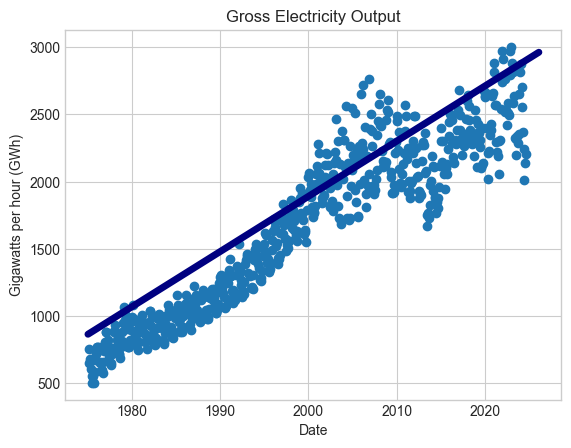

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression(fit_intercept=True)

x = (final_df['Month'].apply(convertdatetime) - final_df['Month'].apply(convertdatetime).min()).dt.days.to_numpy()

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(1825, 20500, 100)
yfit = model.predict(xfit[:, np.newaxis])

plt.title('Gross Electricity Output')
plt.xlabel('Date')
plt.ylabel('Gigawatts per hour (GWh)')
plt.plot(xfit, yfit, c="navy", lw=5);
x = final_df['Month'].apply(convertdatetime).to_numpy()
plt.scatter(x, y)

print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)